# Dataset Description
The following dataset presents aviation related incidents since 1908 until 2009. It consists of information of over 5,000 airplane crashes around the world. Analyizing similar data is important for the advancement of aviation safety. It contains information such as the time and date of the incident, where it happened, how many people were involved, the type of plane and its operator, and much more.

The dataset was obtained from the Data Society, OpenData. The method of aquiring the data was not specifically mentioned by the source.\
*Data Society: https://data.world/data-society/airplane-crashes*

### Rows:
- Each row represents an individual record of an incident involving airplanes since 1908 until 2009.

### Columns:
- **index**: index of the row
- **Date**: date of the incident
- **Time**: time of the incident
- **Location**: location of the incident
- **Operator**: operator of the aircraft
- **Flight #**: flight number of the aircraft
- **Route**: route of the aircraft
- **Type**: type of aircraft
- **Registration**: registration of the aircraft
- **cn/ln**: construction number/serial number of the aircraft
- **Aboard**: number people on board the aircraft
- **Fatalities**: fatalities in the incident
- **Ground**: number of the people on the ground killed
- **Summary**: summary of the incident

*Dataset: https://www.kaggle.com/datasets/thedevastator/airplane-crashes-and-fatalities?select=Airplane_Crashes_and_Fatalities_Since_1908.csv*

In [1]:
#Dataset: https://www.kaggle.com/datasets/thedevastator/airplane-crashes-and-fatalities?select=Airplane_Crashes_and_Fatalities_Since_1908.csv

#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import datetime
from scipy.stats import chi2_contingency

In [2]:
airplane_df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
airplane_df.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


**1. How many aircraft related fatalities are there per year starting from 1908 to 2009?**

In [3]:
year_list = []
airplane_df['Date'] = pd.to_datetime(airplane_df['Date']) # convert to datetime
for i in range(len(airplane_df.index)):
    year_list.append(airplane_df.iloc[i]['Date'].year)

airplane_df2 = airplane_df.assign(Year=year_list)

airplane_df2.groupby(['Year'])['Fatalities'].sum().sort_values(ascending=False).astype(int)


Year
1972    2937
1985    2670
1973    2485
1996    2386
1974    2318
        ... 
1920      24
1924      18
1912       5
1919       5
1908       1
Name: Fatalities, Length: 98, dtype: int32

It can be seen here that the year with the highest number of fatalities is 1972 with 2937 total fatalities recorded and the least number of fatalities was during 1908 with only 1 fatality.

<AxesSubplot: xlabel='Year', ylabel='Fatalities'>

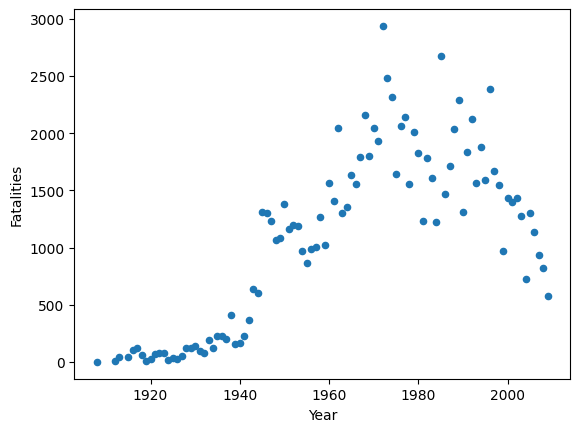

In [4]:
yearly_fatalities = airplane_df2.groupby(['Year'])['Fatalities'].sum().reset_index()
yearly_fatalities.corr()
yearly_fatalities.plot.scatter(x='Year', y='Fatalities')

This plot was set to see if there is any relationship between the year and the number of fatalities recorded. Based on this, it can be assumed that the number of fatalities increased until the 60's before it started to drop again. It can also be noticed that a drastic drop of the number of fatalities started during the 2000's.

*b. What is the average fatalities per decade?*

In [5]:
decade_list = []
for i in range(len(airplane_df.index)):
    decade = int(np.floor(airplane_df2.iloc[i]['Year']/10)*10) # get decade
    decade_list.append(decade)

airplane_df2 = airplane_df2.assign(Decade=decade_list)

decade_fatalities = airplane_df2.groupby(['Decade'])['Fatalities'].mean()
decade_fatalities.round(2)

Decade
1900     1.00
1910    15.08
1920     3.56
1930     5.78
1940    15.93
1950    18.56
1960    23.05
1970    25.24
1980    24.91
1990    21.78
2000    18.97
Name: Fatalities, dtype: float64

- Is there a relationship between the decade that the crash happened and the number of fatalities?

<AxesSubplot: xlabel='Decade'>

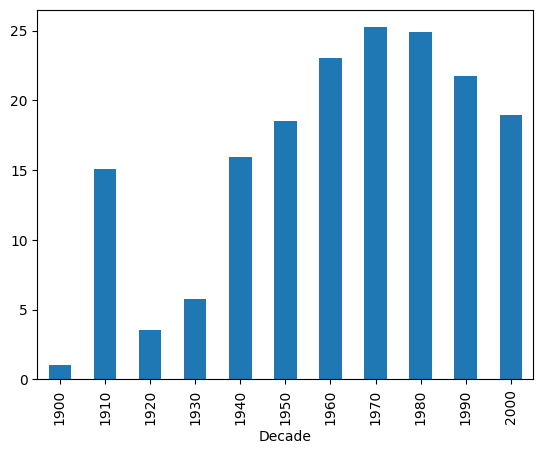

In [6]:
decade_fatalities.plot.bar(x='Decade', y='Fatalities')

There is a sudden jump of fatalities during the second decade. A possible cause for this is because air transportation has just been discovered, a lot of people were trying to innovate and build new machinery which would unfortunately fail. The number of fatalities drastically increased from the 30's to the 60's before it starts a downward trend. This may be due to the sudden rise in demand of air transportation. It was only during the recent years where the development for air transportation safety has picked up pace.

In [7]:
from statsmodels.tsa.stattools import adfuller
def Dickey_Fuller(series, isPrinted):
    fuller = adfuller(series.values)
    adf_stat, pval, crit_values = [fuller[0], fuller[1], fuller[4]]
    if isPrinted:
        print("Dickey Fuller Test:")
        print("\tADF Statistic: %f" % adf_stat)
        print("\tP-Value: %f" % pval)
        print("\tCrit Values: ")
        for key, val in crit_values.items():
            print("\t\t%s: %.3f" % (key, val))
        print("\tResult: %s" % ("\tReject H0; Time Series is Stationary" if adf_stat < crit_values["5%"] else "\tFailed to Reject H0, Time series is Non-Stationary"))
        print()
    return


c:\Users\justin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Dickey Fuller Test:
	ADF Statistic: -1.513286
	P-Value: 0.526929
	Crit Values: 
		1%: -3.501
		5%: -2.892
		10%: -2.583
	Result: 	Failed to Reject H0, Time series is Non-Stationary

Dickey Fuller Test:
	ADF Statistic: -1.514374
	P-Value: 0.526389
	Crit Values: 
		1%: -3.501
		5%: -2.892
		10%: -2.583
	Result: 	Failed to Reject H0, Time series is Non-Stationary



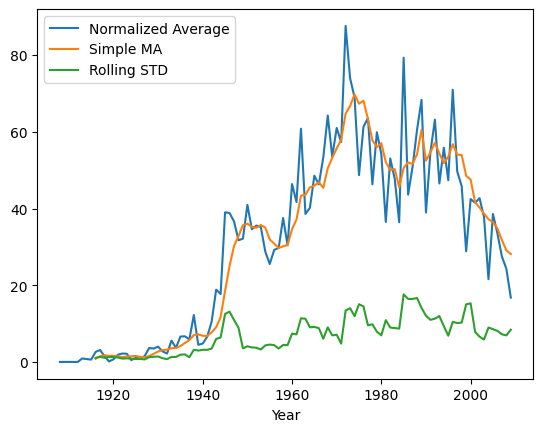

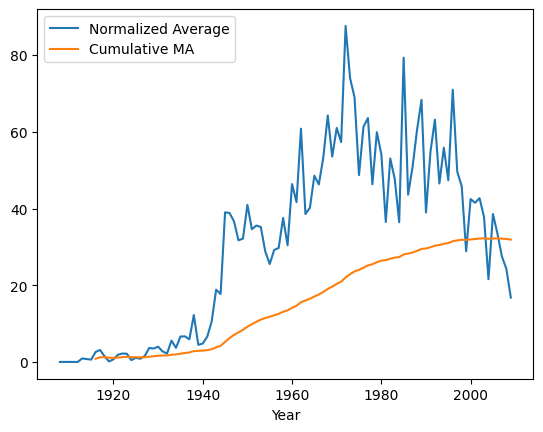

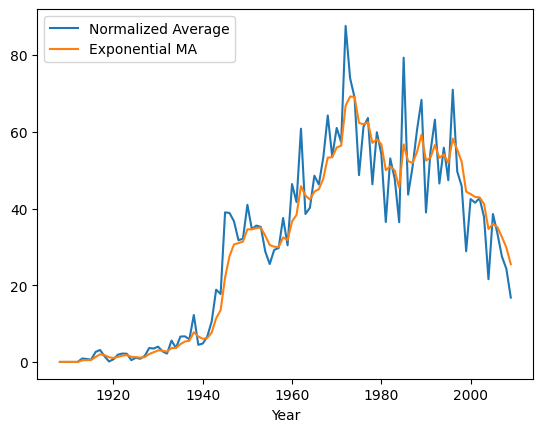

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Cleaning
df = airplane_df.copy()
df = df[df["Fatalities"].notna()]
df = df[df["Date"].notna()]
df = df.reset_index(drop=True)

# Normalization
std = df['Fatalities'].std()
new_df = airplane_df2.groupby('Year')['Fatalities'].agg(**{'Total Fatalities':('sum'), 'Total Reports':('count'), 'Average Fatalities':('mean')}).reset_index()
new_df['Std'] = std
new_df['Normalized Average'] = (new_df['Total Fatalities'] - new_df['Average Fatalities']) / std

# Moving Average Variations
n = 5
new_df['Simple MA'] =       new_df['Normalized Average'].rolling(window=n).mean() 
new_df['Rolling STD'] =     new_df['Normalized Average'].rolling(window=n).std()
new_df['Cumulative MA'] =   new_df['Normalized Average'].expanding(n).mean()
new_df['Exponential MA'] =  new_df['Normalized Average'].ewm(span=n).mean()
new_df['Log'] =             np.log(new_df['Normalized Average'])
new_df = new_df.sort_values(by="Year", ascending=True)

new_df[['Normalized Average','Simple MA', 'Year', 'Rolling STD']].plot.line(x="Year")
new_df[['Normalized Average','Cumulative MA', 'Year']].plot.line(x="Year")
new_df[['Normalized Average','Exponential MA', 'Year']].plot.line(x="Year")
# new_df[['Log', 'Normalized Average', 'Rolling STD', 'Simple MA', 'Year']].plot.line(x='Year')
# plot_acf(new_df['Normalized Average'])

Dickey_Fuller(yearly_fatalities['Fatalities'], True)
Dickey_Fuller(new_df['Normalized Average'], True)

**2. What is the country with the most airplane crashes?**

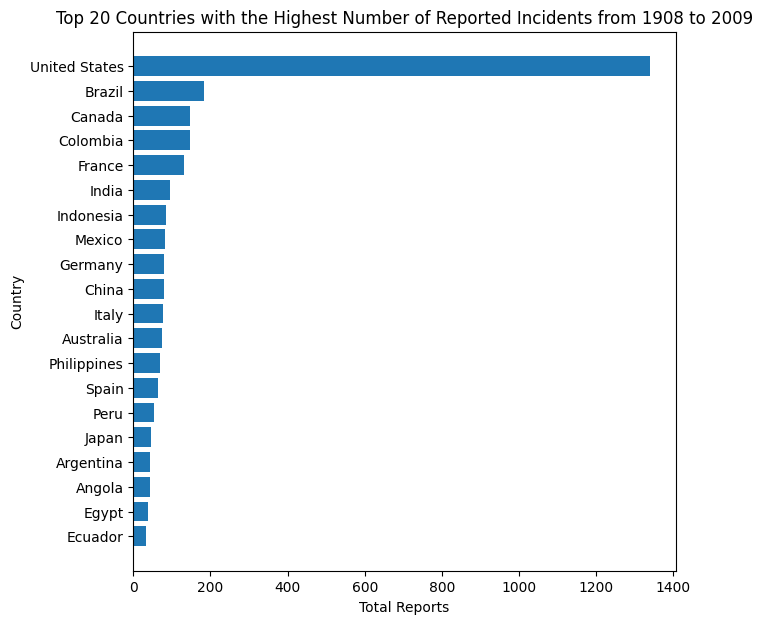

In [9]:
df = airplane_df.copy()

US_states = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
countries = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']

# Cleaning
df = df[df["Fatalities"].notna()]
df = df[df["Type"].notna()]
df = df[df["Location"].notna()]
df = df.reset_index(drop=True)

# Get Location Column
locations = df['Location'].apply(str)

#Get Fatalities Column
fatalities = df['Fatalities']

for loc in locations:
    # Divide string by comma
    split = loc.split(',') 

    # Get Last String and remove any excess spaces
    country = split[-1] if split[-1][0] != ' ' else split[-1][1:]

    if(loc not in countries):
        
    # Replace location with the country string
        if(country in countries):
            df['Location'] = df['Location'].replace(loc, country)

    # Replace any US State with the country of United States
        elif(country in US_states):
            df['Location'] = df['Location'].replace(loc, 'United States')

    # Drop rows with uncertain countries
        else:
            df.drop(df[df['Location'] == loc].index, inplace=True)


country_count = df.groupby(['Location'])['Location'].count().reset_index(name='Number of Reports')

country_count = country_count.sort_values(by=['Number of Reports'], ascending=False)

# top_20 = country_count.head(20)

# fig = plt.figure(figsize=(7,7))
# plt.barh(top_20['Location'], top_20['Number of Reports'])
# plt.gca().invert_yaxis()
# plt.xlabel("Total Reports")
# plt.ylabel("Country")
# plt.title("Top 20 Countries with the Highest Number of Reported Incidents from 1908 to 2009")
# plt.show()

newDf = df.groupby('Location')['Fatalities'].agg(**{'Total Fatalities':('sum'), 'Total Reports':('count'), 'Average Fatalities':('mean')}).reset_index()
sortedReports = newDf.sort_values(by="Total Reports", ascending=False)
sortedFatalities = newDf.sort_values(by="Total Fatalities", ascending=False)
sortedAverage = newDf.sort_values(by="Average Fatalities", ascending=False)

fig = plt.figure(figsize=(7,7))
plt.barh(sortedReports.head(20)['Location'], sortedReports.head(20)['Total Reports'])
plt.gca().invert_yaxis()
plt.xlabel("Total Reports")
plt.ylabel("Country")
plt.title("Top 20 Countries with the Highest Number of Reported Incidents from 1908 to 2009")
plt.show()

After configuring each location to their respective country, each record on the data frame was summed per country. The sum of the top 20 highest total count is shown the by figure above. Amongst all the countries, the United States stands with the highest number of reports, followed by Brazil, Canada, Colombia, and France respectively.

*b. What is the country with the most aircraft related fatalities*

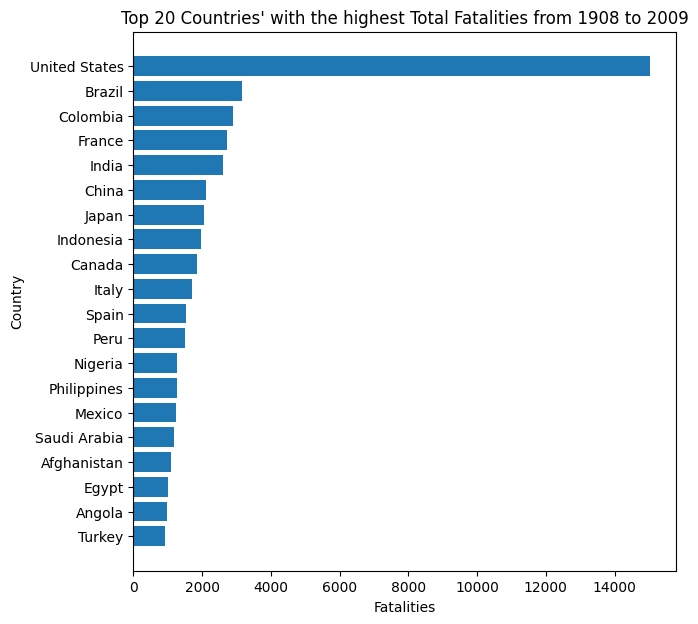

In [10]:
# country_fatalities = df.groupby(['Location'])['Fatalities'].sum().reset_index(name='Total Fatalities')
# country_fatalities = country_fatalities.sort_values(by=['Total Fatalities'], ascending=False)

# average = df.groupby([])

# top_20 = country_fatalities.head(20)

fig = plt.figure(figsize=(7,7))
plt.barh(sortedFatalities.head(20)['Location'], sortedFatalities.head(20)['Total Fatalities'])
plt.gca().invert_yaxis()
plt.xlabel("Fatalities")
plt.ylabel("Country")
plt.title("Top 20 Countries' with the highest Total Fatalities from 1908 to 2009")
plt.show()

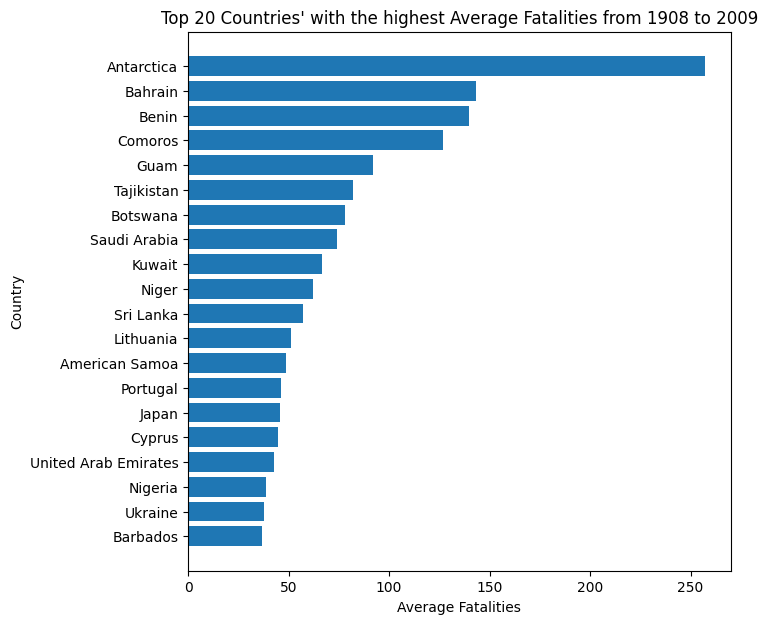

In [11]:
fig = plt.figure(figsize=(7,7))
plt.barh(sortedAverage.head(20)['Location'], sortedAverage.head(20)['Average Fatalities'])
plt.gca().invert_yaxis()
plt.xlabel("Average Fatalities")
plt.ylabel("Country")
plt.title("Top 20 Countries' with the highest Average Fatalities from 1908 to 2009")
plt.show()

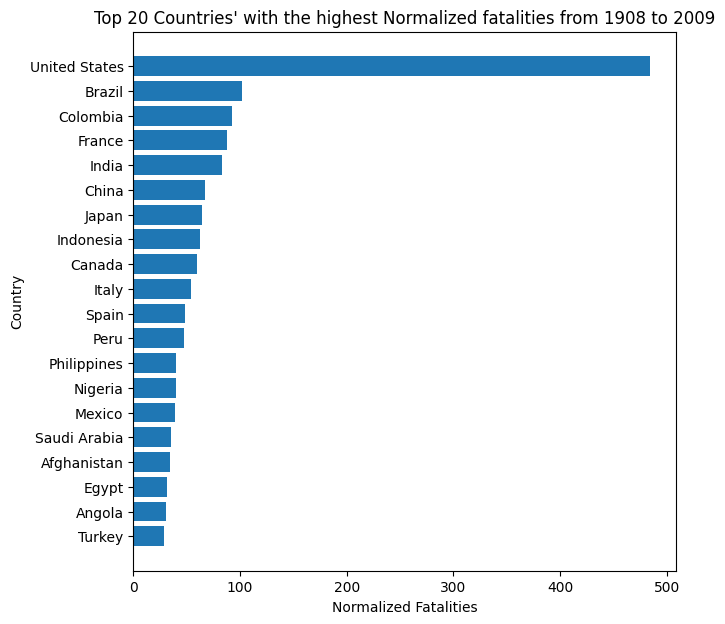

In [12]:
fatalities_std = df['Fatalities'].std()
newDf['normalized'] = (newDf['Total Fatalities'] - newDf['Average Fatalities']) / fatalities_std
normalized = newDf.reset_index().sort_values(by="normalized", ascending=False)

fig = plt.figure(figsize=(7,7))
plt.barh(normalized.head(20)['Location'], normalized.head(20)['normalized'])
plt.gca().invert_yaxis()
plt.xlabel("Normalized Fatalities")
plt.ylabel("Country")
plt.title("Top 20 Countries' with the highest Normalized fatalities from 1908 to 2009")
plt.show()

Similar to the previous figure, each record was grouped by their respective country and instead of summing their count, their fatalities were summed. The figure above shows the top 20 countries with the highest number of fatalities. Amongst all the countries, the United States stands with the highest total fatalities, followed by Brazil, Colombia, France, and India respectively.

**3. What are the common causes of plane crashes?**

Text will be analysed, hence it is best to have function to set all values in a column to lower case

In [13]:
#code here
def to_lower_case(text_series):
    return text_series.str.lower()

In [14]:
airplane_df3 = airplane_df.copy()

In [15]:
airplane_df3['lower_summary'] = to_lower_case(airplane_df3['Summary'])
airplane_df3['lower_summary']

0       during a demonstration flight, a u.s. army fly...
1       first u.s. dirigible akron exploded just offsh...
2       the first fatal airplane accident in canada oc...
3       the airship flew into a thunderstorm and encou...
4       hydrogen gas which was being vented was sucked...
                              ...                        
5263    while on approach, the military transport cras...
5264    the cargo plane crashed while on approach to i...
5265    the airbus went missing over the atlantiocean ...
5266    the air ambulance crashed into hills while att...
5267    the military transport went missing while en r...
Name: lower_summary, Length: 5268, dtype: object

When observing the dataset it is noticeable that there are null values in the Summary Column, we must see if we could just drop the entries that has a null value in the Summary Column

In [16]:
airplane_df3['lower_summary'].isna().sum()

390

Since the values is relatively small compared to the size of the data set, it is safe to drop these entries for analysis

In [17]:
airplane_df3.dropna()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,lower_summary
208,208,1930-01-19,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,16.0,0.0,"While en route to Los Angeles, the pilot, flyi...","while en route to los angeles, the pilot, flyi..."
236,236,1931-03-31,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,8.0,0.0,"Shortly after taking off from Kansas City, one...","shortly after taking off from kansas city, one..."
334,334,1934-08-31,23:42,"Amazonia, Missouri",Rapid Air Transport,6,Omaha - St. Joseph,Stinson SM-6000B,NC10809,5004,5.0,5.0,0.0,The plane crashed about 11 miles from St. Jose...,the plane crashed about 11 miles from st. jose...
354,354,1935-05-06,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,5.0,0.0,The plane crashed while en route from Albuquer...,the plane crashed while en route from albuquer...
365,365,1935-08-14,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,4.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...,crashed 3 miles south of gilmer. the outboard ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,5248,2009-02-12,22:17,"Clarence Center, New York",Continental Connection/Colgan Air,3407,"Newark, N.J. - Buffalo, NY",Bombardier DHC-8-402 Q400,N200WQ,4200,49.0,49.0,1.0,The commuter plane crashed while attemptiong t...,the commuter plane crashed while attemptiong t...
5251,5251,2009-02-25,10:31,"Amsterdam, Netherlands",Turkish Airlines,1951,"Istanbul, Turkey - Amsterdam, Netherlands",Boeing 737-8F2,TC-JGE,29789/1065,134.0,9.0,0.0,The plane was on final approach to Runway 18R ...,the plane was on final approach to runway 18r ...
5255,5255,2009-03-23,06:48,"Tokyo, Japan",FedEx,80,"Guangzhou, China - Tokyo, Japan",McDonnell Douglas MD-11,N526FE,48600/560,2.0,2.0,0.0,The cargo plane crashed and burst into flame a...,the cargo plane crashed and burst into flame a...
5259,5259,2009-04-17,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,11.0,0.0,The passenger plane crashed in poor weather in...,the passenger plane crashed in poor weather in...


Because the values in the Summary are quite long, we will need to map them to the usual causes of airline crashes dependeing on what words are found in those values

In [18]:
def one_word (df_list):
    temp_list = df_list.copy()
    for i in range (len(temp_list)):
        if  "thunder" in str(temp_list[i]) or "weather" in str(temp_list[i]) or "storm" in str(temp_list[i]) or "wind" in str(temp_list[i]) or "rain" in str(temp_list[i]):
            temp_list[i] = 'Weather'
        elif "shot down" in str(temp_list[i]):
            temp_list[i] = 'Shot down'
        elif "engine failure" in str(temp_list[i]):
            temp_list[i] = 'Engine failure'
        elif "shut down" in str(temp_list[i]) or "shut-down" in str(temp_list[i]):
            temp_list[i] = 'Shut down'
        elif "pilot error" in str(temp_list[i]):
            temp_list[i] = 'Pilot error'
        elif "mechanical" in str(temp_list[i]):
            temp_list[i] ='Mechanical'
        elif "exploded" in str(temp_list[i]):
            temp_list[i] ='Exploded'
        elif "missing" in str(temp_list[i]) or "disappeared" in str(temp_list[i]):
            temp_list[i] ='Missing'
        elif "collision" in str(temp_list[i]):
            temp_list[i] ='Collision'
        elif "stalled" in str(temp_list[i]):
            temp_list[i] ='Stalled'
        elif "striking" in str(temp_list[i]):
            temp_list[i] ='Striking'
        else:
            temp_list[i] ='Others'
        
    return temp_list

Now that the Summary values has been shortened it is now easier to analize

In [19]:
one_word_summary =one_word(airplane_df3['lower_summary'])
airplane_df3['one_word_summary'] = one_word_summary
airplane_df3.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,lower_summary,one_word_summary
0,0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...","during a demonstration flight, a u.s. army fly...",Others
1,1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,first u.s. dirigible akron exploded just offsh...,Exploded
2,2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,the first fatal airplane accident in canada oc...,Weather
3,3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,the airship flew into a thunderstorm and encou...,Weather
4,4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,hydrogen gas which was being vented was sucked...,Others


In [20]:
airplane_df3['one_word_summary'].value_counts()

Others            3203
Weather           1276
Engine failure     151
Stalled            137
Shot down          129
Collision          101
Missing             96
Exploded            69
Pilot error         51
Striking            24
Shut down           16
Mechanical          15
Name: one_word_summary, dtype: int64

Text(0.5, 1.0, 'Causes of Crashes')

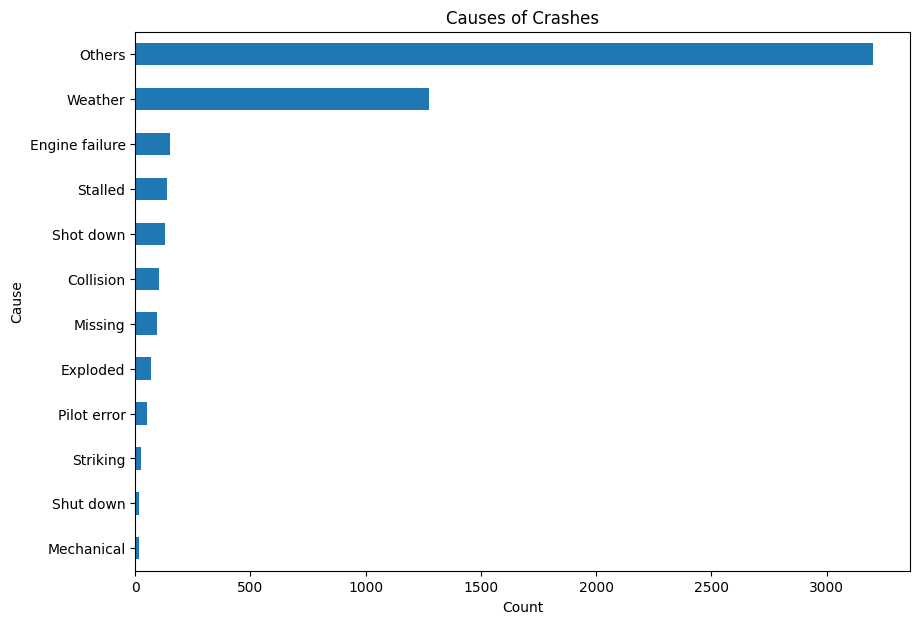

In [21]:
#visualization of the amount of crashes and its causes
airplane_df3['one_word_summary'].value_counts().plot.barh(figsize=(10,7)).invert_yaxis()
plt.ylabel('Cause')
plt.xlabel('Count')
plt.title('Causes of Crashes')

As seen on the bargraph above, the most common reasons for aircraft crashes is simply that it has crashed unto something. Second most common are other incidents less common incidents, while the third most common reasons are due to weather conditions

a. Which causes the highest fatalities on average

In [22]:
fat_mean=airplane_df3.groupby(['one_word_summary'])['Fatalities'].mean()

fat_mean

one_word_summary
Collision         36.425743
Engine failure    18.317881
Exploded          39.043478
Mechanical        24.933333
Missing           29.957895
Others            17.630278
Pilot error       21.333333
Shot down         34.222222
Shut down         14.562500
Stalled           27.489051
Striking          17.666667
Weather           21.140502
Name: Fatalities, dtype: float64

<AxesSubplot: xlabel='one_word_summary'>

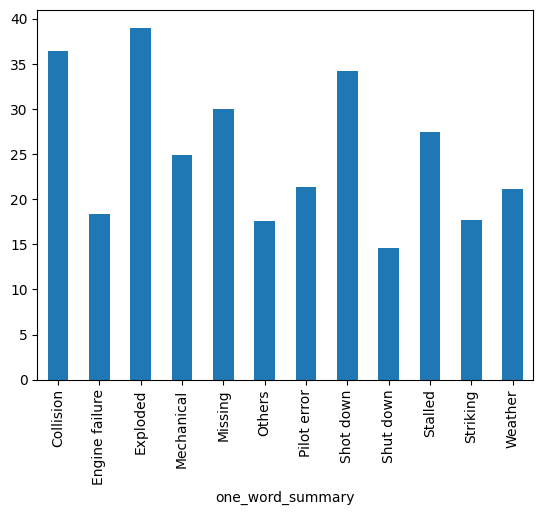

In [23]:
fat_mean.plot.bar(x='one_word_summary', y='Fatalities')

As seen on the bar graph it seems that what yields the most fatalities on average is when the aircraft explodes

# Research Question:
### What considerations can be made to lessen the risk of future air transportation related incidents and fatalities?
***EDA 1***\
Knowing the number of fatalities per year and per decade helps give us a grasp if there is a trend or improvement in terms of air transportation safety through out the years. It also shows if there were significant events given a certain year/decade which contributed to the increase of air related incidents (e.g. World War II)

***EDA 2***\
Knowing the number of fatalities per country helps give us a better understanding of locations with a higher risk of air related incidents. Additionally, knowing the number of reports per country helps us determine which country has the most frequent aircraft related activities and has had lacking safety protocols or measures.

***EDA 3***\
Knowing the common causes of plane crashes will allow engineers to focus on specific areas for further research and development in relation to safety. This will also allow for a more careful inspection during aircraft maintainance by knowing common fault areas of the plane. Additionally, investigators may be given an advantage by knowing the historical causes of plane crashes.

***Importance and significance of the research question***\
The data that will be analyized may be used by historians, engineers, pilots, investigators, and even passengers. The given considerations may help aerospace companies further develop their policies and design for the safety of both passengers and crew. Additionally, investigators and historians may refer to the analyized data when investigating the causes of plane crashes and incidents.